In [1]:
# Import the ``ansys.dpf.core`` module
import ansys.dpf.core as dpf
# Import the examples module
from ansys.dpf.core import examples
# Import the operators module
from ansys.dpf.core import operators as ops

# Download and get the path to an example result file
result_file_path_1 = examples.download_piston_rod()

# Create a model from the result file
model_1 = dpf.Model(data_sources=result_file_path_1)

In [2]:
# Get the displacement operator for this model
disp_op = model_1.results.displacement()

In [3]:
# Define the scale factor
scl_fct = 2.0

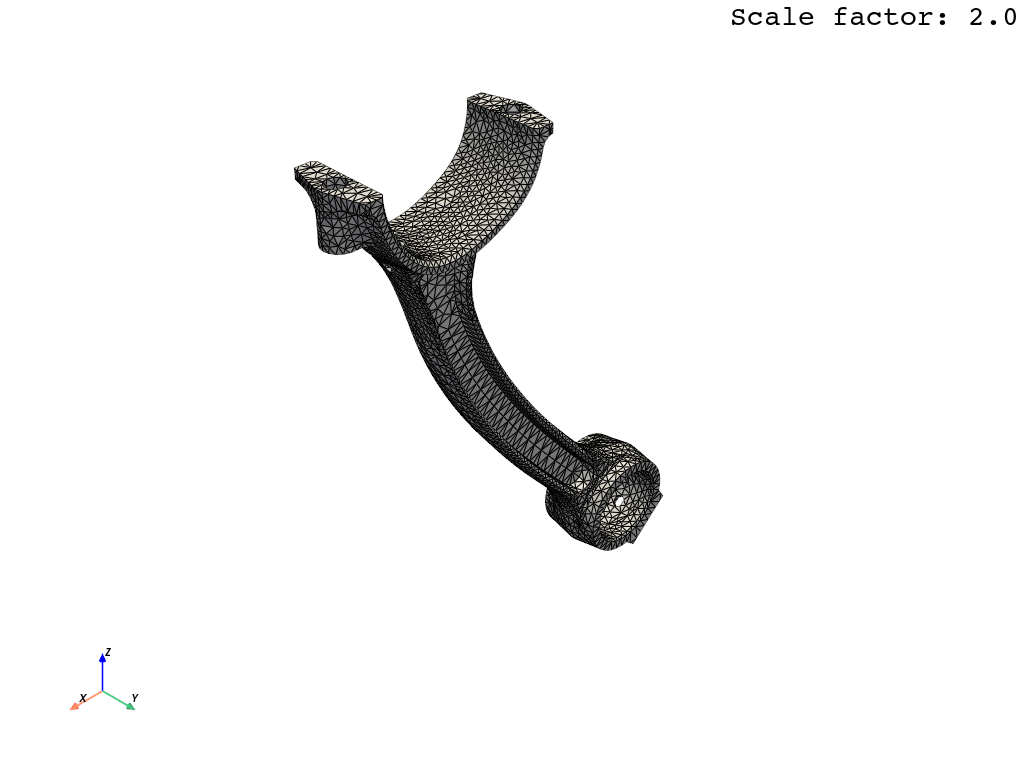

(None, <pyvista.plotting.plotter.Plotter at 0x15e1ba08150>)

In [4]:
# Plot the deformed mesh
model_1.plot(deform_by=disp_op, scale_factor=scl_fct)

In [5]:
# Define the scale factor
scl_fct = 2.0

In [6]:
# Extract the mesh
meshed_region_1 = model_1.metadata.meshed_region

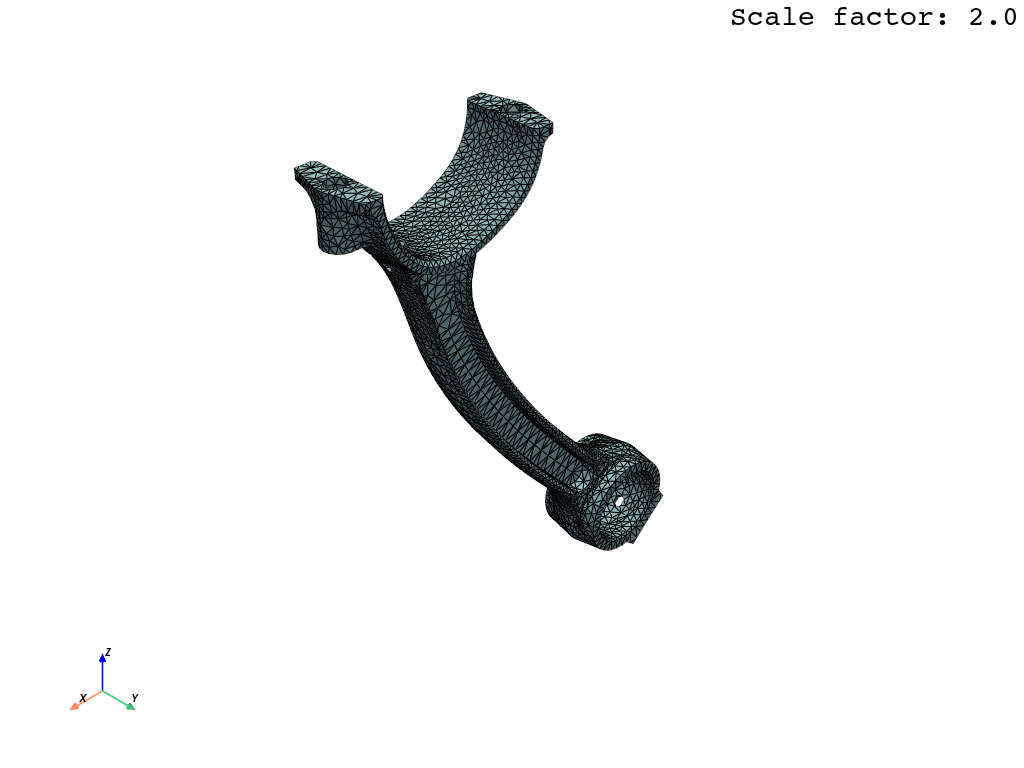

(None, <pyvista.plotting.plotter.Plotter at 0x15e1b9fb950>)

In [7]:
# Plot the deformed mesh
meshed_region_1.plot(deform_by=disp_op, scale_factor=scl_fct)

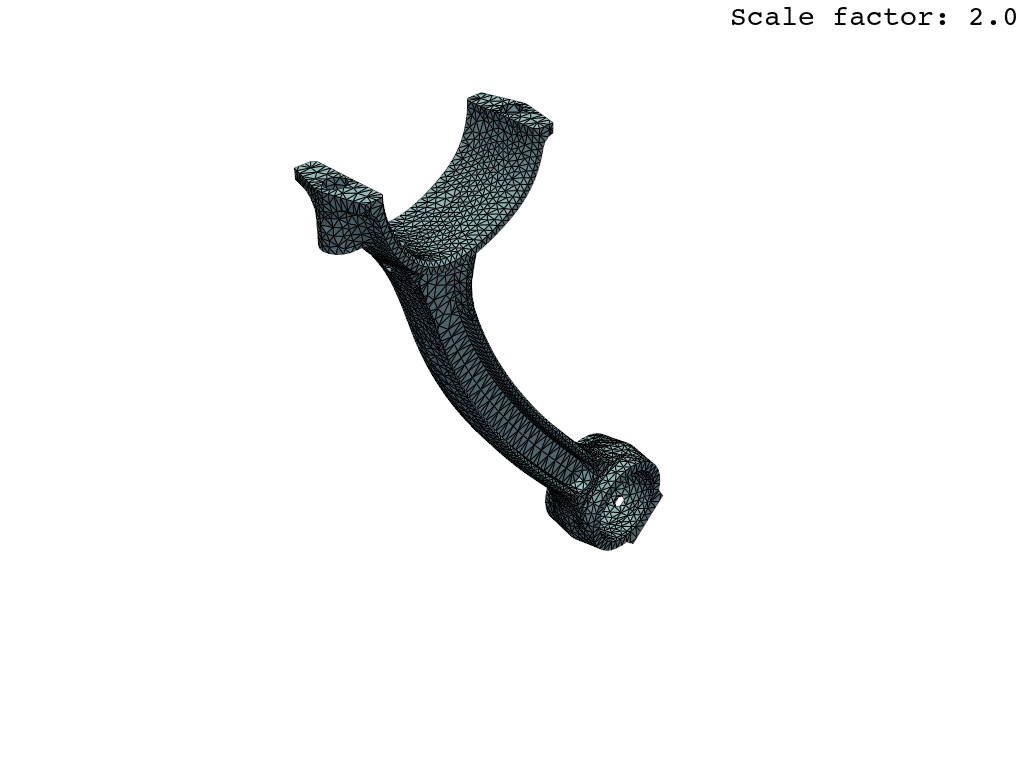

(None, <pyvista.plotting.plotter.Plotter at 0x15e1a8baed0>)

In [8]:
# Create a DpfPlotter instance
plotter_1 = dpf.plotter.DpfPlotter()

# Add the mesh to the scene with deformation
plotter_1.add_mesh(meshed_region=meshed_region_1,
                   deform_by=disp_op,
                   scale_factor=scl_fct)

# Display the scene
plotter_1.show_figure()

In [9]:
# Split the mesh based on material property
meshes = ops.mesh.split_mesh(mesh=meshed_region_1, property="mat").eval()

# Show the result
print(meshes)

DPF  Meshes Container
  with 2 mesh(es)
  defined on labels: body mat 

  with:
  - mesh 0 {mat:  1, body:  1, } with 17281 nodes and 9026 elements.
  - mesh 1 {mat:  2, body:  2, } with 17610 nodes and 9209 elements.



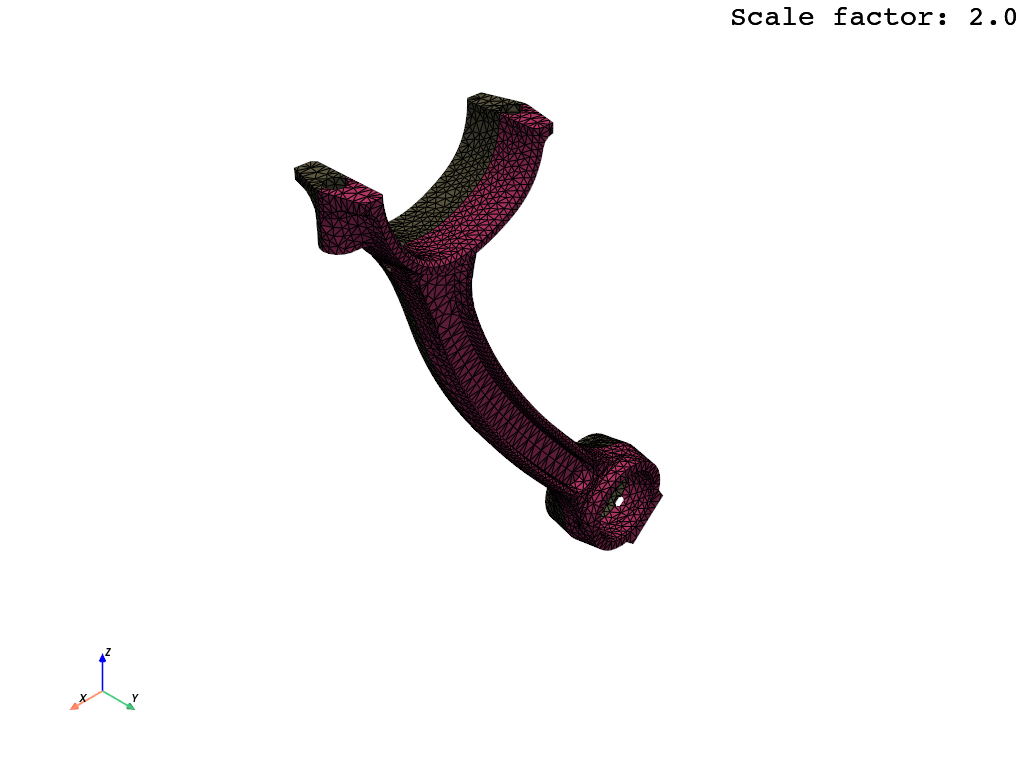

(None, <pyvista.plotting.plotter.Plotter at 0x15e299a7fd0>)

In [10]:
# Plot the deformed mesh
meshes.plot(deform_by=disp_op, scale_factor=scl_fct)

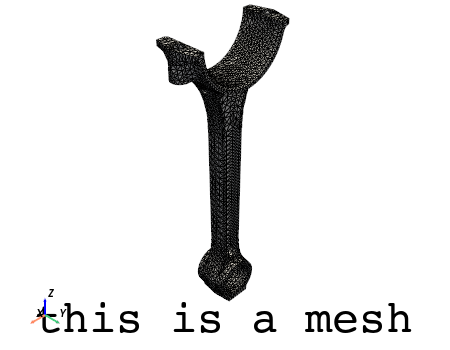

(None, <pyvista.plotting.plotter.Plotter at 0x15e1a55d250>)

In [11]:
model_1.plot(title="Mesh",
             text="this is a mesh",  # Adds the given text at the bottom of the plot
             off_screen=True,
             screenshot="mesh_plot_1.png",  # Save a screenshot to file with the given name
             window_size=[450,350])
# Notes:
# - To save a screenshot to file, use "screenshot=figure_name.png" ( as well as "notebook=False" if on a Jupyter notebook).
# - The "off_screen" keyword only works when "notebook=False". If "off_screen=True" the plot is not displayed when running the code.